In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img_referencia = cv2.imread('images/exercicio_kp/obj02_001.jpg')
img_cena = cv2.imread('images/exercicio_kp/test19.jpg')

In [3]:
akaze = cv2.AKAZE_create()
kpts_ref, desc_ref = akaze.detectAndCompute(img_referencia, None)
kpts_cena, desc_cena = akaze.detectAndCompute(img_cena, None)

In [4]:
matcher = cv2.BFMatcher_create()

In [5]:
nn_matches = matcher.knnMatch(desc_ref, desc_cena, 2)

In [6]:
matched = []
nn_match_ratio = 0.7
for m, n in nn_matches:
    if m.distance < nn_match_ratio * n.distance:
        matched.append([m])

In [10]:
resultado = cv2.drawMatchesKnn(img_referencia, kpts_ref, img_cena, kpts_cena, matched, None)

In [11]:
resultado = cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB)

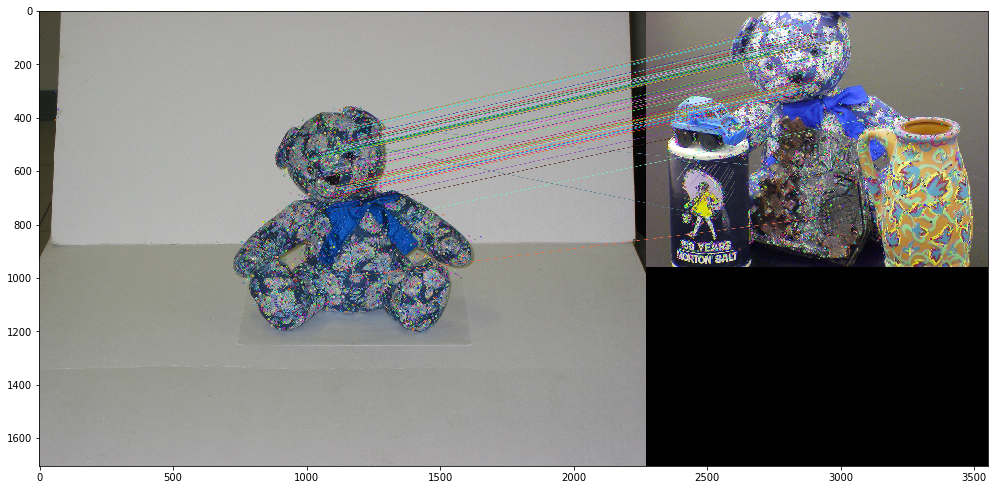

In [12]:
plt.rcParams['figure.figsize'] = [17, 22]
plt.imshow(resultado)